## Correlations Between SAT Scores and Demographics

The SAT, or Scholastic Aptitude Test, is a test given to graduating high schoolers in the US every year. The SAT has 3 sections, each of which is worth a maximum of 800 points. The SAT is used by colleges to determine which students to admit. High average SAT scores are usually indicative of a good school.

New York City makes its data on __[high school SAT scores](https://data.cityofnewyork.us/Education/2012-SAT-Results/f9bf-2cp4)__ available online, as well as the __[demographics for each high school](https://data.cityofnewyork.us/Education/2014-2015-DOE-High-School-Directory/n3p6-zve2)__.

1. SAT scores by school: SAT scores for each high school in New York City.
2. School attendance: attendance information on every school in NYC.
3. Class size class size information for each school in NYC.
4. AP test results: Advanced Placement exam results for each high school. Passing AP exams can get you college credit in the US.
5. Graduation outcomes: percentage of students who graduated, and other outcome information.
6. Demographics: demographic information for each school.
7. School survey: surveys of parents, teachers, and students at each school.

New York City has a significant immigrant population, and is very diverse, so comparing demographic factors such as race, income, and gender with SAT scores is a good way to figure out if the SAT is a fair test. If certain racial groups consistently performed better on the SAT, we would have some evidence that the SAT is unfair, for example. 

One of the most controversial issues in the U.S. educational system is the efficacy of standardized tests, and whether they're unfair to certain groups. Given our prior knowledge of this topic, investigating the correlations between SAT scores and demographics might be an interesting angle to take. We could correlate SAT scores with factors like race, gender, income, and more.

### Summary of Results
1. Safety score ranges from 5. to 9.0. No school with a safety score lower than 6.5 has an average SAT score higher than 1500 or so. Upper Manhattan, west Queens and lower Bronx tend to have higher safety scores, whereas Brooklyn has low safety scores.
2. Higer SAT score is seen in schools with higher percentage of white or asian students and specialized science and technology schools whereas lower SAT scores are seen in schools having a higher percentage of black or hispanic students and international schools.
3. Each borough except Brooklyn has a school where hispanic student percentage is less than 10% and average SAT score of the school is greater than 1800.
4. There is a strong correlation between survey responded by parents, teachers and students in every field except communication. When it comes to communication score, there's a weak correlation between parents' response and teachers' response.
5. Bronx has more schools with 95% hispanic student popluation, it has the lowest average SAT score and many low performing schools. But few schools in are also amongst the highest 3% of SAT score schools.
6. Manhattan Area has selective liberal arts schools with with a female percentage greater than 60% and an average SAT score greater than 1700, schools with highest 3% of SAT score and many high performing schools. It has the 2nd highest mean SAT score.
7. Queens has a mix of high and low performing schools. Queens schools have an average SAT score.
8. Brooklyn has the 2nd lowest mean SAT score, it has a mix of high and low performing schools.
9. Staten Island has the highest averag SAT score.

### Read Data
We will read each file into a Pandas Dataframe, and then store all of the Dataframes in a dictionary.

In [61]:
#Import required libraries
from warnings import simplefilter
import pandas as pd
import numpy
import re
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
%matplotlib inline
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

We have five csv data files which we will read data from and two text files.

In [62]:
#Read data from csv files
data_files = [
    "ap_2010.csv",
    "class_size.csv",
    "demographics.csv",
    "graduation.csv",
    "hs_directory.csv",
    "sat_results.csv"
]

data = {}

for f in data_files:
    d = pd.read_csv("SAT Data\{0}"".format(f))
    #Add data for each csv in a dictionary.
    data[f.replace(".csv", "")] = d

### Exploring the SAT Data
The main dataset that we're interested in is the SAT dataset, which corresponds to the dictionary key sat_results. This contains information about the SAT scores for each high school in New York City. We eventually want to correlate items from this dataset with items from the other datasets.

Let us explore sat_results to see what we can discover. Exploring the Dataframe will enable us to understand the structure of the data, which will make it easier to analyze.

In [63]:
#Check if data is correctly loaded.
data["sat_results"].head(2)

,DBN,SCHOOL NAME,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score
0,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,29,355,404,363
1,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,91,383,423,366


From looking at the data, we can make a few observations:

The DBN appears to be a unique ID for each school.
From looking at the first few rows of names, we only have data about high schools.
There's only a single row for each high school, so each DBN is unique in the SAT data.
We may eventually want to combine the three columns that contain SAT scores -- SAT Critical Reading Avg., Score SAT Math Avg. Score, and SAT Writing Avg. Score into a single column to make it easier to analyze.

### Reading the Survey Data

In [64]:
#Read data from text files.
all_survey = pd.read_csv("survey_all.txt", delimiter="\t", encoding='windows-1252')
d75_survey = pd.read_csv("survey_d75.txt", delimiter="\t", encoding='windows-1252')

In [65]:
#Combine both survey files
survey = pd.concat([all_survey, d75_survey], axis=0)
pd.options.display.max_columns = 150 # to avoid truncated output 
survey.head(3)

,N_p,N_s,N_t,aca_p_11,aca_s_11,aca_t_11,aca_tot_11,bn,com_p_11,com_s_11,com_t_11,com_tot_11,d75,dbn,eng_p_11,eng_s_11,eng_t_11,eng_tot_11,highschool,nr_p,nr_s,nr_t,p_N_q10a,p_N_q10a_1,p_N_q10a_2,p_N_q10a_3,p_N_q10a_4,p_N_q10a_5,p_N_q10b,p_N_q10b_1,p_N_q10b_2,p_N_q10b_3,p_N_q10b_4,p_N_q10b_5,p_N_q10c,p_N_q10c_1,p_N_q10c_2,p_N_q10c_3,p_N_q10c_4,p_N_q10c_5,p_N_q10d,p_N_q10d_1,p_N_q10d_2,p_N_q10d_3,p_N_q10d_4,p_N_q10d_5,p_N_q10e,p_N_q10e_1,p_N_q10e_2,p_N_q10e_3,p_N_q10e_4,p_N_q10e_5,p_N_q10f,p_N_q10f_1,p_N_q10f_2,p_N_q10f_3,p_N_q10f_4,p_N_q10f_5,p_N_q10g,p_N_q10h,p_N_q10i,p_N_q10j,p_N_q10k,p_N_q10l,p_N_q11a_1,p_N_q11a_2,p_N_q11a_3,p_N_q11a_4,p_N_q11a_5,p_N_q11b_1,p_N_q11b_2,p_N_q11b_3,p_N_q11b_4,p_N_q11b_5,p_N_q11c_1,...,t_q6j_2,t_q6j_3,t_q6j_4,t_q6k,t_q6k_1,t_q6k_2,t_q6k_3,t_q6k_4,t_q6l,t_q6l_1,t_q6l_2,t_q6l_3,t_q6l_4,t_q6m,t_q6m_1,t_q6m_2,t_q6m_3,t_q6m_4,t_q7a,t_q7a_1,t_q7a_2,t_q7a_3,t_q7a_4,t_q7a_5,t_q7b,t_q7b_1,t_q7b_2,t_q7b_3,t_q7b_4,t_q7b_5,t_q7c,t_q7c_1,t_q7c_2,t_q7c_3,t_q7c_4,t_q7c_5,t_q7d,t_q7d_1,t_q7d_2,t_q7d_3,t_q7d_4,t_q7d_5,t_q7e,t_q7e_1,t_q7e_2,t_q7e_3,t_q7e_4,t_q7e_5,t_q7f,t_q7f_1,t_q7f_2,t_q7f_3,t_q7f_4,t_q7f_5,t_q8a,t_q8a_1,t_q8a_2,t_q8a_3,t_q8a_4,t_q8b,t_q8b_1,t_q8b_2,t_q8b_3,t_q8b_4,t_q8c,t_q8c_1,t_q8c_2,t_q8c_3,t_q8c_4,t_q9,t_q9_1,t_q9_2,t_q9_3,t_q9_4,t_q9_5
0,90.0,NaN,22.0,7.8,NaN,7.9,7.9,M015,7.6,NaN,7.8,7.7,0,01M015,7.5,NaN,7.6,7.5,0.0,150,0,25,56.0,NaN,NaN,NaN,NaN,NaN,30.0,NaN,NaN,NaN,NaN,NaN,6.0,NaN,NaN,NaN,NaN,NaN,49.0,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,56.0,11.0,6.0,33.0,1.0,1.0,50.0,36.0,3.0,1.0,NaN,33.0,42.0,10.0,1.0,NaN,38.0,...,55.0,0.0,0.0,9.2,80.0,15.0,5.0,0.0,9.2,75.0,25.0,0.0,0.0,NaN,62.0,38.0,0.0,0.0,7.3,33.0,57.0,5.0,5.0,0.0,6.2,24.0,43.0,29.0,5.0,0.0,6.8,24.0,57.0,19.0,0.0,0.0,6.3,14.0,57.0,24.0,0.0,5.0,6.8,19.0,71.0,5.0,5.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,7.0,30.0,50.0,20.0,0.0,7.0,20.0,70.0,10.0,0.0,7.5,29.0,67.0,5.0,0.0,NaN,5.0,14.0,52.0,24.0,5.0
1,161.0,NaN,34.0,7.8,NaN,9.1,8.4,M019,7.6,NaN,8.5,8.1,0,01M019,7.6,NaN,8.9,8.2,0.0,269,0,33,76.0,NaN,NaN,NaN,NaN,NaN,105.0,NaN,NaN,NaN,NaN,NaN,22.0,NaN,NaN,NaN,NaN,NaN,99.0,NaN,NaN,NaN,NaN,NaN,23.0,NaN,NaN,NaN,NaN,NaN,16.0,NaN,NaN,NaN,NaN,NaN,75.0,33.0,18.0,83.0,4.0,2.0,89.0,59.0,7.0,2.0,NaN,66.0,72.0,16.0,3.0,NaN,62.0,...,6.0,3.0,0.0,9.6,91.0,6.0,3.0,0.0,9.8,94.0,6.0,0.0,0.0,NaN,85.0,9.0,6.0,0.0,8.8,70.0,21.0,3.0,3.0,3.0,8.2,67.0,15.0,9.0,6.0,3.0,8.8,73.0,18.0,0.0,6.0,3.0,8.8,67.0,24.0,6.0,0.0,3.0,8.6,67.0,21.0,9.0,0.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,8.8,68.0,29.0,3.0,0.0,9.0,74.0,24.0,3.0,0.0,8.9,74.0,21.0,6.0,0.0,NaN,3.0,6.0,3.0,78.0,9.0
2,367.0,NaN,42.0,8.6,NaN,7.5,8.0,M020,8.3,NaN,6.3,7.3,0,01M020,8.3,NaN,6.8,7.5,0.0,505,0,48,176.0,NaN,NaN,NaN,NaN,NaN,173.0,NaN,NaN,NaN,NaN,NaN,40.0,NaN,NaN,NaN,NaN,NaN,219.0,NaN,NaN,NaN,NaN,NaN,43.0,NaN,NaN,NaN,NaN,NaN,36.0,NaN,NaN,NaN,NaN,NaN,210.0,65.0,48.0,203.0,16.0,13.0,246.0,105.0,6.0,0.0,NaN,193.0,147.0,12.0,1.0,NaN,195.0,...,38.0,3.0,10.0,7.8,33.0,67.0,0.0,0.0,7.9,38.0,59.0,3.0,0.0,NaN,28.0,59.0,13.0,0.0,5.9,16.0,50.0,29.0,5.0,0.0,6.8,26.0,58.0,5.0,8.0,3.0,7.3,29.0,61.0,5.0,3.0,3.0,6.2,18.0,53.0,26.0,3.0,0.0,6.7,24.0,55.0,18.0,3.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,6.4,23.0,52.0,20.0,5.0,6.3,23.0,52.0,18.0,8.0,6.3,33.0,35.0,20.0,13.0,NaN,3.0,5.0,16.0,70.0,5.0


In [66]:
#Capitalize DBN to match other files.
survey["DBN"] = survey["dbn"]

#There are over 2000 columns in the the survey files, almost all of which we won't need. 
#These columns will give us aggregate survey data about how parents, teachers, and students feel about school safety, 
#academic performance, and more. It will also give us the DBN, which allows us to uniquely identify the school.
survey_fields = ["DBN", "rr_s", "rr_t", "rr_p", "N_s", "N_t", "N_p", "saf_p_11", "com_p_11", "eng_p_11", "aca_p_11", 
                 "saf_t_11", "com_t_11", "eng_t_11", "aca_t_11", "saf_s_11", "com_s_11", "eng_s_11", "aca_s_11", 
                 "saf_tot_11", "com_tot_11", "eng_tot_11", "aca_tot_11"]

survey = survey.loc[:,survey_fields]

#Add survey to data dictionary along with the other files.
data["survey"] = survey

In [67]:
#Check if data is correctly loaded.
for key in data:
    print ("**************Data for:", key, "*************")
    print (data[key].head(2), "\n")

**************Data for: ap_2010 *************
      DBN                    SchoolName  AP Test Takers   Total Exams Taken  \
0  01M448  UNIVERSITY NEIGHBORHOOD H.S.  39.0             49.0                
1  01M450  EAST SIDE COMMUNITY HS        19.0             21.0                

   Number of Exams with scores 3 4 or 5  
0  10.0                                  
1 NaN                                     

**************Data for: class_size *************
   CSD BOROUGH SCHOOL CODE                SCHOOL NAME GRADE  PROGRAM TYPE  \
0  1    M       M015        P.S. 015 Roberto Clemente  0K     GEN ED        
1  1    M       M015        P.S. 015 Roberto Clemente  0K     CTT           

  CORE SUBJECT (MS CORE and 9-12 ONLY) CORE COURSE (MS CORE and 9-12 ONLY)  \
0  -                                    -                                    
1  -                                    -                                    

  SERVICE CATEGORY(K-9* ONLY)  NUMBER OF STUDENTS / SEATS FILLED  \
0  -

### Investigating DBN Column

Looking at the DBN column in the above dataframes: 
1. Dataset 'class_size' does not have a DBN column. 
2. 'hs_directory' has a dbn column, so we can just rename it.
3. Looking at the DBN in 'sat_results', it is a combination of the CSD and SCHOOL CODE columns in the 'class_size' data. DBN is padded, so that the CSD portion of it always consists of two digits.

In [68]:
#Capitalize DBN in hs_directory to match other files.
data["hs_directory"]["DBN"] = data["hs_directory"]["dbn"]

In [69]:
#Create DBN in class_size from available data
def pad_csd(num):
    string_num = str(num)
    if len(string_num) > 1:
        return string_num
    else:
        #DBN always consists of two digits. Add a leading 0 to the CSD if the CSD is less than two digits long
        return "0" + string_num  
    
data["class_size"]["padded_csd"] = data["class_size"]["CSD"].apply(pad_csd)
data["class_size"]["DBN"] = data["class_size"]["padded_csd"] + data["class_size"]["SCHOOL CODE"]

In [70]:
#Check DBN column created in class_size
data["class_size"]["DBN"].value_counts().head()

15K429    57
09X505    56
09X517    56
15K448    52
21K690    52
Name: DBN, dtype: int64

### Combined SAT Scores Into One Column For Each Student
If there is just one column which totals the SAT scores for the different sections of the exam, it will make it much easier to correlate scores with demographic factors. We can add up SAT Math Avg. Score, SAT Critical Reading Avg. Score, and SAT Writing Avg. Score to get the total SAT score.

In [71]:
#Create a list of columns for the total SAT Score
cols = ['SAT Math Avg. Score', 'SAT Critical Reading Avg. Score', 'SAT Writing Avg. Score']

#Convert the SAT Math Avg. Score, SAT Critical Reading Avg. Score, and SAT Writing Avg. Score columns from object data type to a numeric.
for c in cols:
    data["sat_results"][c] = pd.to_numeric(data["sat_results"][c], errors = "coerce") # treat invalid strings as missing values

#Create sat_score as a combined column for SAT Math, critical reading and writing scores
data["sat_results"]["sat_score"] = data["sat_results"][cols[2]] + data["sat_results"][cols[1]] + data["sat_results"][cols[2]]

### Parsing Geographic Coordinates For Each School
To enable us to map out the schools, and figure out any geographic patterns in the data, we will parse the coordinates for each school. Currently, the coordinates are in a text field called 'Location 1' in the 'hs_directory' dataset. We will extract the latitude and the longitude. 

In [72]:
pd.set_option('display.max_colwidth', -1) #avoid truncating the output
data["hs_directory"].head(2)['Location 1']

0    883 Classon Avenue\nBrooklyn, NY 11225\n(40.67029890700047, -73.96164787599963)
1    1110 Boston Road\nBronx, NY 10456\n(40.8276026690005, -73.90447525699966)      
Name: Location 1, dtype: object

This field contains a lot of information we don't need. We want to extract the coordinates, which are in parentheses at the end of the field.

In [73]:
#Extract latitude and longitude from single column
def extract_lat(loc):
    coords = re.findall("\(.+\)",loc)
    lat_lon  = coords[0].split(sep = ',')[0].replace("(","")
    return (lat_lon)

def extract_lon(loc):
    coords = re.findall("\(.+\)",loc)
    lat_lon  = coords[0].split(sep = ',')[1].replace(")","")
    return (lat_lon)

data["hs_directory"]["lat"] = data["hs_directory"]["Location 1"].apply(extract_lat)
data["hs_directory"]["lon"] = data["hs_directory"]["Location 1"].apply(extract_lon)

#Convert to numeric
data["hs_directory"]["lat"] = pd.to_numeric(data["hs_directory"]["lat"], errors = 'coerce')
data["hs_directory"]["lon"] = pd.to_numeric(data["hs_directory"]["lon"], errors = 'coerce')

In [74]:
# Check if data is correctly loaded.
data["hs_directory"]["lat"].head(2)

0    40.670299
1    40.827603
Name: lat, dtype: float64

In [75]:
# Check if data is correctly loaded.
data["hs_directory"]["lon"].head(2)

0   -73.961648
1   -73.904475
Name: lon, dtype: float64

### Condense datasets

#### 1. Condensing the Class Size Data Set

In [76]:
data['class_size'][data['class_size']["SCHOOL CODE"] == "M015"].head(5)

,CSD,BOROUGH,SCHOOL CODE,SCHOOL NAME,GRADE,PROGRAM TYPE,CORE SUBJECT (MS CORE and 9-12 ONLY),CORE COURSE (MS CORE and 9-12 ONLY),SERVICE CATEGORY(K-9* ONLY),NUMBER OF STUDENTS / SEATS FILLED,NUMBER OF SECTIONS,AVERAGE CLASS SIZE,SIZE OF SMALLEST CLASS,SIZE OF LARGEST CLASS,DATA SOURCE,SCHOOLWIDE PUPIL-TEACHER RATIO,padded_csd,DBN
0,1,M,M015,P.S. 015 Roberto Clemente,0K,GEN ED,-,-,-,19.0,1.0,19.0,19.0,19.0,ATS,NaN,01,01M015
1,1,M,M015,P.S. 015 Roberto Clemente,0K,CTT,-,-,-,21.0,1.0,21.0,21.0,21.0,ATS,NaN,01,01M015
2,1,M,M015,P.S. 015 Roberto Clemente,01,GEN ED,-,-,-,17.0,1.0,17.0,17.0,17.0,ATS,NaN,01,01M015
3,1,M,M015,P.S. 015 Roberto Clemente,01,CTT,-,-,-,17.0,1.0,17.0,17.0,17.0,ATS,NaN,01,01M015
4,1,M,M015,P.S. 015 Roberto Clemente,02,GEN ED,-,-,-,15.0,1.0,15.0,15.0,15.0,ATS,NaN,01,01M015


The first few rows all pertain to the same school, which is why the DBN appears more than once. It looks like each school has multiple values for GRADE, PROGRAM TYPE, CORE SUBJECT (MS CORE and 9-12 ONLY), and CORE COURSE (MS CORE and 9-12 ONLY)

In [77]:
#Unique values for grade
data["class_size"]["GRADE "].unique()

array(['0K', '01', '02', '03', '04', '05', '0K-09', nan, '06', '07', '08',
       'MS Core', '09-12', '09'], dtype=object)

We are dealing with high schools only, so we will select grades 9 through 12 (09-12).

In [78]:
#Unique values for Program Type
data["class_size"]["PROGRAM TYPE"].unique()

array(['GEN ED', 'CTT', 'SPEC ED', nan, 'G&T'], dtype=object)

Each school can have multiple program types. Because GEN ED is the largest category by far, we will only select rows where PROGRAM TYPE is GEN ED.

In [79]:
#Condense class size
class_size = data["class_size"]

class_size = class_size[class_size["GRADE "] == "09-12"]
class_size = class_size[class_size["PROGRAM TYPE"] == "GEN ED"]

#Check data
class_size.head(2)

,CSD,BOROUGH,SCHOOL CODE,SCHOOL NAME,GRADE,PROGRAM TYPE,CORE SUBJECT (MS CORE and 9-12 ONLY),CORE COURSE (MS CORE and 9-12 ONLY),SERVICE CATEGORY(K-9* ONLY),NUMBER OF STUDENTS / SEATS FILLED,NUMBER OF SECTIONS,AVERAGE CLASS SIZE,SIZE OF SMALLEST CLASS,SIZE OF LARGEST CLASS,DATA SOURCE,SCHOOLWIDE PUPIL-TEACHER RATIO,padded_csd,DBN
225,1,M,M292,Henry Street School for International Studies,09-12,GEN ED,ENGLISH,English 9,-,63.0,3.0,21.0,19.0,25.0,STARS,NaN,01,01M292
226,1,M,M292,Henry Street School for International Studies,09-12,GEN ED,ENGLISH,English 10,-,79.0,3.0,26.3,24.0,31.0,STARS,NaN,01,01M292


We can see that the School Code is still not unique due to the CORE COURSE (MS CORE and 9-12 ONLY) and CORE SUBJECT (MS CORE and 9-12 ONLY) columns.

In [80]:
#Unique values for Program Type
data["class_size"]["CORE SUBJECT (MS CORE and 9-12 ONLY)"].unique()

array(['-', nan, 'ENGLISH', 'MATH', 'SCIENCE', 'SOCIAL STUDIES'],
      dtype=object)

In [81]:
#Unique values for Program Type
data["class_size"]["CORE COURSE (MS CORE and 9-12 ONLY)"].unique()

array(['-', nan, 'MS English Core', 'MS Math Core', 'MS Science Core',
       'MS Social Studies Core', 'Global History & Geography',
       'Integrated Algebra', 'Living Environment',
       'Participation in Government', 'US History & Government',
       'English 9', 'English 10', 'English 11', 'English 12', 'Geometry',
       'Other Math', 'Earth Science', 'Chemistry', 'Physics',
       'Other Science', 'Other English', 'Trigonometry', 'Math A',
       'Economics', 'Other Social Studies', 'Math B'], dtype=object)

The values seem to pertain to different kinds of classes. We want our class size data to include every single class a school offers -- not just a subset of them. What we can do is take the average across all of the classes a school offers. This will give us unique DBN values, while also incorporating as much data as possible into the average.

##### Computing Average Class Sizes

In [82]:
#Compute Average class sizes
class_size = class_size.groupby("DBN").agg(numpy.mean)
class_size.reset_index(inplace=True)
data["class_size"] = class_size
data["class_size"].head(5)

,DBN,CSD,NUMBER OF STUDENTS / SEATS FILLED,NUMBER OF SECTIONS,AVERAGE CLASS SIZE,SIZE OF SMALLEST CLASS,SIZE OF LARGEST CLASS,SCHOOLWIDE PUPIL-TEACHER RATIO
0,01M292,1,88.0000,4.000000,22.564286,18.50,26.571429,NaN
1,01M332,1,46.0000,2.000000,22.000000,21.00,23.500000,NaN
2,01M378,1,33.0000,1.000000,33.000000,33.00,33.000000,NaN
3,01M448,1,105.6875,4.750000,22.231250,18.25,27.062500,NaN
4,01M450,1,57.6000,2.733333,21.200000,19.40,22.866667,NaN


#### 2. Condensing the Demographics Data Set

In [83]:
data["demographics"].head()

,DBN,Name,schoolyear,fl_percent,frl_percent,total_enrollment,prek,k,grade1,grade2,grade3,grade4,grade5,grade6,grade7,grade8,grade9,grade10,grade11,grade12,ell_num,ell_percent,sped_num,sped_percent,ctt_num,selfcontained_num,asian_num,asian_per,black_num,black_per,hispanic_num,hispanic_per,white_num,white_per,male_num,male_per,female_num,female_per
0,01M015,P.S. 015 ROBERTO CLEMENTE,20052006,89.4,NaN,281,15,36,40,33,38,52,29,38,NaN,NaN,NaN,NaN,NaN,NaN,36.0,12.8,57.0,20.3,25,9,10,3.6,74,26.3,189,67.3,5,1.8,158.0,56.2,123.0,43.8
1,01M015,P.S. 015 ROBERTO CLEMENTE,20062007,89.4,NaN,243,15,29,39,38,34,42,46,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38.0,15.6,55.0,22.6,19,15,18,7.4,68,28.0,153,63.0,4,1.6,140.0,57.6,103.0,42.4
2,01M015,P.S. 015 ROBERTO CLEMENTE,20072008,89.4,NaN,261,18,43,39,36,38,47,40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52.0,19.9,60.0,23.0,20,14,16,6.1,77,29.5,157,60.2,7,2.7,143.0,54.8,118.0,45.2
3,01M015,P.S. 015 ROBERTO CLEMENTE,20082009,89.4,NaN,252,17,37,44,32,34,39,49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48.0,19.0,62.0,24.6,21,17,16,6.3,75,29.8,149,59.1,7,2.8,149.0,59.1,103.0,40.9
4,01M015,P.S. 015 ROBERTO CLEMENTE,20092010,,96.5,208,16,40,28,32,30,24,38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.0,19.2,46.0,22.1,14,14,16,7.7,67,32.2,118,56.7,6,2.9,124.0,59.6,84.0,40.4


The only column that prevents a given DBN from being unique is schoolyear. We only want to select rows where schoolyear is 20112012. This will give us the most recent year of data, and also match our SAT results data.

In [84]:
#Condense demographics
data["demographics"] = data["demographics"][data["demographics"]["schoolyear"] == 20112012]

#### 3. Condensing the Graduation Data Set

In [85]:
data["graduation"][data['graduation']["DBN"] == "01M292"].head(5)

,Demographic,DBN,School Name,Cohort,Total Cohort,Total Grads - n,Total Grads - % of cohort,Total Regents - n,Total Regents - % of cohort,Total Regents - % of grads,Advanced Regents - n,Advanced Regents - % of cohort,Advanced Regents - % of grads,Regents w/o Advanced - n,Regents w/o Advanced - % of cohort,Regents w/o Advanced - % of grads,Local - n,Local - % of cohort,Local - % of grads,Still Enrolled - n,Still Enrolled - % of cohort,Dropped Out - n,Dropped Out - % of cohort
0,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2003,5,s,NaN,s,NaN,NaN,s,NaN,NaN,s,NaN,NaN,s,NaN,NaN,s,NaN,s,NaN
1,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2004,55,37,67.3,17,30.9,45.9,0,0.0,0.0,17,30.9,45.9,20,36.4,54.1,15,27.3,3,5.5
2,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2005,64,43,67.2,27,42.2,62.8,0,0.0,0.0,27,42.2,62.8,16,25.0,37.2,9,14.1,9,14.1
3,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2006,78,43,55.1,36,46.2,83.7,0,0.0,0.0,36,46.2,83.7,7,9.0,16.3,16,20.5,11,14.1
4,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2006 Aug,78,44,56.4,37,47.4,84.1,0,0.0,0.0,37,47.4,84.1,7,9.0,15.9,15,19.2,11,14.1


The Demographic and Cohort columns are what prevent DBN from being unique in the graduation data. A Cohort appears to refer to the year the data represents, and the Demographic appears to refer to a specific demographic group. In this case, we want to pick data from the most recent Cohort available, which is 2006. We also want data from the full cohort, so we'll only pick rows where Demographic is Total Cohort.

In [86]:
#Filter graduation data
data["graduation"] = data["graduation"][data["graduation"]["Cohort"] == "2006"]
data["graduation"] = data["graduation"][data["graduation"]["Demographic"] == "Total Cohort"]

### Convert AP scores to numeric
It will be interesting to see if AP exam scores are correlated with SAT scores across high schools. In order to determine this, we'll need to convert the AP exam scores in the ap_2010 dataset to numeric values first.

There are three columns we'll need to convert:
1. AP Test Takers 
2. Total Exams Taken
3. Number of Exams with scores 3 4 or 5

In [87]:
cols = ['AP Test Takers ', 'Total Exams Taken', 'Number of Exams with scores 3 4 or 5']

#Convert AP exam scores to numeric values
for col in cols:
    data["ap_2010"][col] = pd.to_numeric(data["ap_2010"][col], errors="coerce")
    
data["ap_2010"].head()

,DBN,SchoolName,AP Test Takers,Total Exams Taken,Number of Exams with scores 3 4 or 5
0,01M448,UNIVERSITY NEIGHBORHOOD H.S.,39.0,49.0,10.0
1,01M450,EAST SIDE COMMUNITY HS,19.0,21.0,NaN
2,01M515,LOWER EASTSIDE PREP,24.0,26.0,24.0
3,01M539,"NEW EXPLORATIONS SCI,TECH,MATH",255.0,377.0,191.0
4,02M296,High School of Hospitality Management,NaN,NaN,NaN


### Combine the Data Sets
This project is concerned with determing demographic factors that correlate with SAT score, we'll want to preserve as many rows as possible from sat_results while minimizing null values. We will combine the data sets on the unique DBN column.

In [88]:
#add 'sat_results' to the combined dataframe
combined = data["sat_results"]

Both the ap_2010 and the graduation datasets have many missing DBN values, so we'll use a left join when we join the 
sat_results dataset with them.

In [89]:
#Left join 'ap_2010' with 'sat_results'
combined = pd.merge(left = combined, right = data["ap_2010"], on="DBN", how="left")
combined.shape

(479, 11)

In [90]:
#Left join 'graduation' with 'sat_results' and 'ap_2010'
combined = pd.merge(left = combined, right = data["graduation"], on="DBN", how="left")
combined.shape

(479, 33)

Class_size, demographics, survey and hs_directory contain information that's more valuable to our analysis, and because they 
have fewer missing DBN values, we will use the inner join type when merging these into combined.

In [91]:
#Inner join with combined data
to_merge = ["class_size", "demographics", "survey", "hs_directory"]

for m in to_merge:
    combined = combined.merge(data[m], on="DBN", how="inner")
    
#Check how our new combined table looks.
combined.shape

(363, 165)

### Filling missing values
The inner joins resulted in 116 fewer rows in sat_results. This is because pandas couldn't find the DBN values that existed in sat_results in the other data sets. We now have many columns with null (NaN) values because we choose left join.

Fill the null values with mean for that column. If any null values are still left(if entire row in NaN), fill them with 0.

In [92]:
combined = combined.fillna(combined.mean())
combined = combined.fillna(0)

In [93]:
#Check merged data
combined.head(2)

,DBN,SCHOOL NAME,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score,sat_score,SchoolName,AP Test Takers,Total Exams Taken,Number of Exams with scores 3 4 or 5,Demographic,School Name,Cohort,Total Cohort,Total Grads - n,Total Grads - % of cohort,Total Regents - n,Total Regents - % of cohort,Total Regents - % of grads,Advanced Regents - n,Advanced Regents - % of cohort,Advanced Regents - % of grads,Regents w/o Advanced - n,Regents w/o Advanced - % of cohort,Regents w/o Advanced - % of grads,Local - n,Local - % of cohort,Local - % of grads,Still Enrolled - n,Still Enrolled - % of cohort,Dropped Out - n,Dropped Out - % of cohort,CSD,NUMBER OF STUDENTS / SEATS FILLED,NUMBER OF SECTIONS,AVERAGE CLASS SIZE,SIZE OF SMALLEST CLASS,SIZE OF LARGEST CLASS,SCHOOLWIDE PUPIL-TEACHER RATIO,Name,schoolyear,fl_percent,frl_percent,total_enrollment,prek,k,grade1,grade2,grade3,grade4,grade5,grade6,grade7,grade8,grade9,grade10,grade11,grade12,ell_num,ell_percent,sped_num,sped_percent,ctt_num,selfcontained_num,asian_num,asian_per,black_num,black_per,hispanic_num,hispanic_per,white_num,white_per,male_num,male_per,...,aca_t_11,saf_s_11,com_s_11,eng_s_11,aca_s_11,saf_tot_11,com_tot_11,eng_tot_11,aca_tot_11,dbn,school_name,borough,building_code,phone_number,fax_number,grade_span_min,grade_span_max,expgrade_span_min,expgrade_span_max,bus,subway,primary_address_line_1,city,state_code,postcode,website,total_students,campus_name,school_type,overview_paragraph,program_highlights,language_classes,advancedplacement_courses,online_ap_courses,online_language_courses,extracurricular_activities,psal_sports_boys,psal_sports_girls,psal_sports_coed,school_sports,partner_cbo,partner_hospital,partner_highered,partner_cultural,partner_nonprofit,partner_corporate,partner_financial,partner_other,addtl_info1,addtl_info2,start_time,end_time,se_services,ell_programs,school_accessibility_description,number_programs,priority01,priority02,priority03,priority04,priority05,priority06,priority07,priority08,priority09,priority10,Location 1,Community Board,Council District,Census Tract,BIN,BBL,NTA,lat,lon
0,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,29,355.0,404.0,363.0,1081.0,0,129.028846,197.038462,153.45,Total Cohort,HENRY STREET SCHOOL FOR INTERNATIONAL,2006,78.0,43,55.1,36,46.2,83.7,0,0.0,0.0,36,46.2,83.7,7,9.0,16.3,16,20.5,11,14.1,1,88.0000,4.00,22.564286,18.50,26.571429,0.0,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,20112012,0,88.6,422,,,,,,,,32,33,50,98,79,80,50,94.0,22.3,105.0,24.9,34,35,59,14.0,123,29.1,227,53.8,7,1.7,259.0,61.4,...,6.5,6.0,5.6,6.1,6.7,6.7,6.2,6.6,7.0,01M292,Henry Street School for International Studies,Manhattan,M056,212-406-9411,212-406-9417,6.0,12,0.0,12.0,"B39, M14A, M14D, M15, M15-SBS, M21, M22, M9","B, D to Grand St ; F to East Broadway ; J, M, Z to Delancey St-Essex St",220 Henry Street,New York,NY,10002,http://schools.nyc.gov/schoolportals/01/M292,323.0,0,0,"Henry Street School for International Studies is a unique small school founded by the Asia Society. While in pursuit of knowledge about other world regions, including their histories, economies and world languages, students acquire the knowledge and skills needed to prepare for college and/or careers. Teachers and other adults who make up the learning community forge supportive relationships with students and parents while providing challenging and engaging learning experiences. Our school partners with various community, arts and business organizations to help students achieve success. Our theme of international studies extends beyond the classroom, where students participate in ongoing ‘Advisory Day Out’ excursions where the multiculturalism of NYC becomes the classroom.","Global/International Studies in core subjects, Literacy block schedule, Personalized instruction in small classes, Student Advisories, International travel opportunities, After-school program focused on youth leadership","Chinese (Mandarin), Spanish",Psychology,"Ch

In [94]:
combined.columns.values

array(['DBN', 'SCHOOL NAME', 'Num of SAT Test Takers',
       'SAT Critical Reading Avg. Score', 'SAT Math Avg. Score',
       'SAT Writing Avg. Score', 'sat_score', 'SchoolName',
       'AP Test Takers ', 'Total Exams Taken',
       'Number of Exams with scores 3 4 or 5', 'Demographic',
       'School Name', 'Cohort', 'Total Cohort', 'Total Grads - n',
       'Total Grads - % of cohort', 'Total Regents - n',
       'Total Regents - % of cohort', 'Total Regents - % of grads',
       'Advanced Regents - n', 'Advanced Regents - % of cohort',
       'Advanced Regents - % of grads', 'Regents w/o Advanced - n',
       'Regents w/o Advanced - % of cohort',
       'Regents w/o Advanced - % of grads', 'Local - n',
       'Local - % of cohort', 'Local - % of grads', 'Still Enrolled - n',
       'Still Enrolled - % of cohort', 'Dropped Out - n',
       'Dropped Out - % of cohort', 'CSD',
       'NUMBER OF STUDENTS / SEATS FILLED', 'NUMBER OF SECTIONS',
       'AVERAGE CLASS SIZE', 'SIZE OF SMALL

### Add a School District Column For Mapping
Adding a column to the data set that specifies the school district will help us map the statistics out on a school district level. The school district is just the first two characters of the DBN.

In [95]:
#Function to extract the school district from DBN
def get_first_two_chars(dbn):
    return dbn[0:2]

combined["school_dist"] = combined["DBN"].apply(get_first_two_chars)
combined["school_dist"].head()

0    01
1    01
2    01
3    01
4    01
Name: school_dist, dtype: object

### Find correlations

Correlations tell us how closely related two columns are. We'll be using the r value, also called Pearson's correlation coefficient, which measures how closely two sequences of numbers are correlated.
An r value falls between -1 and 1, and tells you if the two columns are positively correlated, not correlated, or negatively correlated. The closer to 1 the r value is, the more strongly positively correlated the columns are. The closer to -1 the r value is, the more strongly negatively correlated the columns are. The closer to 0 the r value is, the less the columns are correlated.

In [96]:
correlations = combined.corr()

#Check correlations for 'sat_score' as we are analysing that column.
pd.options.display.max_rows = 200 # to avoid truncated output
correlations = correlations["sat_score"]
print(correlations)

SAT Critical Reading Avg. Score         0.992196
SAT Math Avg. Score                     0.934214
SAT Writing Avg. Score                  0.998165
sat_score                               1.000000
AP Test Takers                          0.499825
Total Exams Taken                       0.493318
Number of Exams with scores 3 4 or 5    0.450233
Total Cohort                            0.286075
Total Grads - % of cohort               0.595908
Total Regents - % of cohort             0.670424
Total Regents - % of grads              0.484595
Advanced Regents - % of cohort          0.744247
Advanced Regents - % of grads           0.706530
Regents w/o Advanced - % of cohort     -0.101143
Regents w/o Advanced - % of grads      -0.426375
Local - % of cohort                    -0.453508
Local - % of grads                     -0.484595
Still Enrolled - % of cohort           -0.503841
Dropped Out - % of cohort              -0.467617
CSD                                     0.017904
NUMBER OF STUDENTS /

Unsurprisingly, SAT Critical Reading Avg. Score, SAT Math Avg. Score, SAT Writing Avg. Score, and sat_score are strongly correlated with sat_score.

We can also make some other observations:
1. Total_enrollment has a strong positive correlation with sat_score. This is surprising because we'd expect smaller schools where students receive more attention to have higher scores. However, it looks like the opposite is true -- larger schools tend to do better on the SAT.
2. Both the percentage of females (female_per) and number of females (female_num) at a school correlate positively with SAT score, whereas the percentage of males (male_per) and the number of males (male_num) correlate negatively. This could indicate that women do better on the SAT than men.
3. Teacher and student ratings of school safety (saf_t_11, and saf_s_11) correlate with sat_score.
4. Student ratings of school academic standards (aca_s_11) correlate with sat_score, but this does not hold for ratings from teachers and parents (aca_p_11 and aca_t_11).
5. There is significant racial inequality in SAT scores (white_per, asian_per, black_per, hispanic_per).
6. The percentage of English language learners at the school (ell_percent, frl_percent) has a strong negative correlation with SAT scores.

### Plotting survey correlations
Because enrollment seems to have such a strong correlation, let's make a scatterplot of total_enrollment vs sat_score. Each point in the scatterplot will represent a high school.

In [97]:
# Remove DBN since it's a unique identifier, not a useful numerical value for correlation.
survey_fields.remove("DBN")

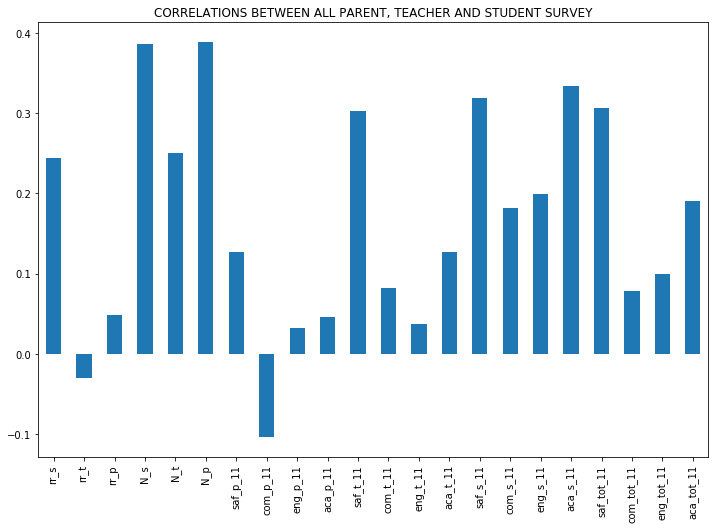

In [98]:
#Bar plot of correlations between all parent,teacher and student survey columns and the sat score.
combined.corr()["sat_score"][survey_fields].plot.bar(figsize =(12,8), title = "CORRELATIONS BETWEEN ALL PARENT, TEACHER AND STUDENT SURVEY")

There are high positive correlations between sat score and N_s(number of student resopondents), N_t(teacher) and N_p(parents). Since these columns are correlated with total_enrollment, it makes sense that they would be high.
It is more interesting that rr_s, the student response rate, or the percentage of students that completed the survey, correlates with sat_score. This might make sense because students who are more likely to fill out surveys may be more likely to also be doing well academically.
How students and teachers percieved safety (saf_t_11 and saf_s_11) correlate with sat_score. This make sense, as it's hard to teach or learn in an unsafe environment.
The last interesting correlation is the aca_s_11, which indicates how the student perceives academic standards, correlates with sat_score, but this is not true for aca_t_11, how teachers perceive academic standards, or aca_p_11, how parents perceive academic standards.

### Safety and SAT Scores
Now that our dataset is clean and finalized, we can start with our analysis.

#### Safety and SAT Score Scatter Plot

Text(0, 0.5, 'SAT Score')

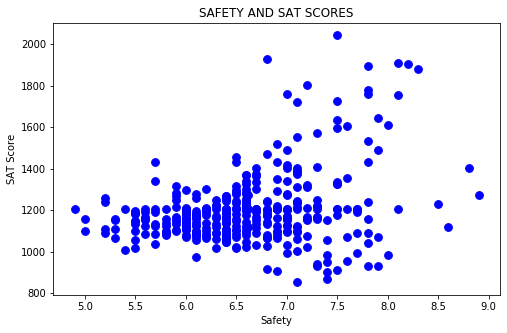

In [99]:
#plot of the saf_s_11 column vs. the sat_score 
combined.plot(kind = 'scatter', x = 'saf_s_11', y = 'sat_score', figsize = (8, 5), s = 60, color ='blue', title = "SAFETY AND SAT SCORES")
plt.xlabel("Safety")
plt.ylabel("SAT Score")

There appears to be a correlation between SAT scores and safety, although it isn't that strong. It looks like there are a few schools with extremely high SAT scores and high safety scores. There are a few schools with low safety scores and low SAT scores. No school with a safety score lower than 6.5 has an average SAT score higher than 1500 or so.

We'll investigate safety scores district-wise.

In [100]:
#Average safety score for each district.
district = combined.groupby("school_dist").mean()
district.reset_index(inplace=True)

#Check data
pd.options.display.max_columns = 200 # to avoid truncated output
print (district.head(3))

  school_dist  SAT Critical Reading Avg. Score  SAT Math Avg. Score  \
0  01          441.833333                       473.333333            
1  02          426.619092                       444.186256            
2  03          428.529851                       437.997512            

   SAT Writing Avg. Score    sat_score  AP Test Takers   Total Exams Taken  \
0  439.333333              1320.500000  116.681090       173.019231          
1  424.832836              1276.284764  128.908454       201.516827          
2  426.915672              1282.361194  156.183494       244.522436          

   Number of Exams with scores 3 4 or 5  Total Cohort  \
0  135.800000                            93.500000      
1  157.495833                            158.647849     
2  193.087500                            183.384409     

   Total Grads - % of cohort  Total Regents - % of cohort  \
0  71.333333                  66.416667                     
1  75.453574                  64.166074            

#### Plot School Safety in NYC Boroughs

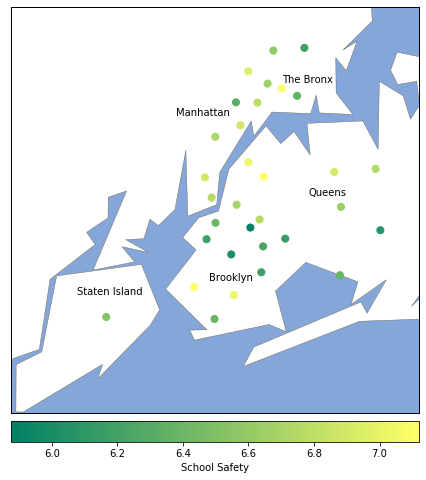

In [135]:
#Plotting NYC's 5 boroughs area and school safety.
plt.figure(figsize=(8,8))
m = Basemap(
    projection='merc', 
    llcrnrlat=40.496044, 
    urcrnrlat=40.915256, 
    llcrnrlon=-74.255735, 
    urcrnrlon=-73.700272,
    resolution='i'
)

m.drawmapboundary(fill_color='#85A6D9')
m.drawcoastlines(color='#6D5F47', linewidth=.4)
m.drawrivers(color='#6D5F47', linewidth=.4)
m.fillcontinents(color='white',lake_color='#85A6D9')

plt.text(45000,33000, "Queens")
plt.text(41000,50000, "The Bronx")
plt.text(25000,45000, "Manhattan")
plt.text(30000,20000, "Brooklyn")
plt.text(10000,18000, "Staten Island")
longitudes = district["lon"].tolist()
latitudes = district["lat"].tolist()
m.scatter(longitudes, latitudes, s=50, zorder=2, latlon=True, c=district["saf_s_11"], cmap="summer")
m.colorbar(location='bottom', label='School Safety')
plt.show()

Upper Manhattan, west Queens and lower Bronx tend to have higher safety scores, whereas Brooklyn has low safety scores.

### Race and SAT scores
There are a few columns that indicate the percentage of each race at a given school:
1. white_per
2. asian_per
3. black_per
4. hispanic_per

#### Race and SAT Score Correlations
By plotting out the correlations between these columns and sat_score, we can see if there are any racial differences in SAT performance.

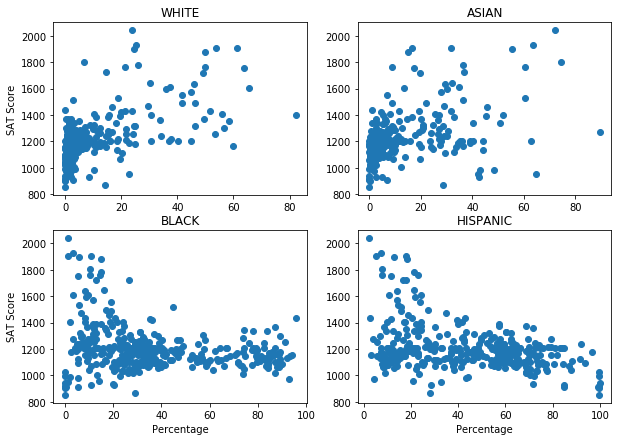

In [136]:
#These columns indicate the percentage of each race at a given school.
race_columns = ["white_per", "asian_per", "black_per", "hispanic_per"]

#Investigate racial differences in SAT scores.
#combined.corr()["sat_score"][race_columns].plot.bar()
fig = plt.figure(figsize=(10,7))
ax1 = fig.add_subplot(2,2,1)
ax1.scatter(combined["white_per"], combined["sat_score"])
ax1.set_title("WHITE")
ax1.set_ylabel("SAT Score")
ax2 = fig.add_subplot(2,2,2)
ax2.scatter(combined["asian_per"], combined["sat_score"])
ax2.set_title("ASIAN")
ax3 = fig.add_subplot(2,2,3)
ax3.scatter(combined["black_per"], combined["sat_score"])
ax3.set_title("BLACK")
ax3.set_xlabel("Percentage")
ax3.set_ylabel("SAT Score")
ax4 = fig.add_subplot(2,2,4)
ax4.scatter(combined["hispanic_per"], combined["sat_score"])
ax4.set_title("HISPANIC")
ax4.set_xlabel("Percentage")
plt.show()

It looks like a higher percentage of white or asian students at a school correlate positively with sat score, whereas a higher percentage of black or hispanic students correlates negatively with sat score. This may be due to a lack of funding for schools in certain areas, which are more likely to have a higher percentage of black or hispanic students.

#### Schools and Boroughs with Higher Hispanic Student Percentage

In [137]:
#Research any schools with a hispanic percentage > 95%
hispanic_90 = combined[combined["hispanic_per"] > 90]
hispanic_90[["SCHOOL NAME", "sat_score"]]

,SCHOOL NAME,sat_score
44,MANHATTAN BRIDGES HIGH SCHOOL,1024.0
80,CITY COLLEGE ACADEMY OF THE ARTS,1240.0
81,COMMUNITY HEALTH ACADEMY OF THE HEIGHTS,1096.0
82,WASHINGTON HEIGHTS EXPEDITIONARY LEARNING SCHOOL,1178.0
84,HIGH SCHOOL FOR INTERNATIONAL BUSINESS AND FINANCE,1121.0
89,GREGORIO LUPERON HIGH SCHOOL FOR SCIENCE AND MATHEMATICS,991.0
125,ACADEMY FOR LANGUAGE AND TECHNOLOGY,909.0
141,INTERNATIONAL SCHOOL FOR LIBERAL ARTS,902.0
176,PAN AMERICAN INTERNATIONAL HIGH SCHOOL AT MONROE,917.0
253,MULTICULTURAL HIGH SCHOOL,851.0


Majority are international schools primarily geared towards recent immigrants to US, which can explain the low SAT scores as they would have a lot of English learning students. 

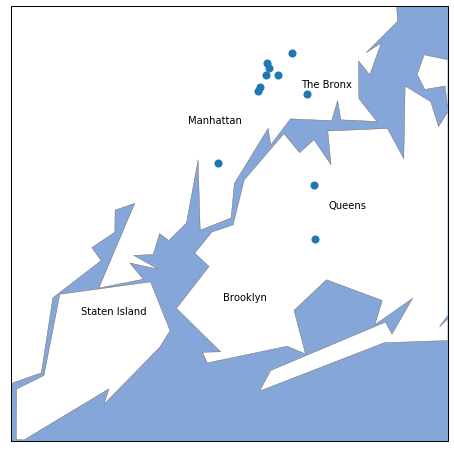

In [139]:
#Plot schools with hispanic percentage > 90%
plt.figure(figsize=(8,8))
m = Basemap(
    projection='merc', 
    llcrnrlat=40.496044, 
    urcrnrlat=40.915256, 
    llcrnrlon=-74.255735, 
    urcrnrlon=-73.700272,
    resolution='i'
)
m.drawmapboundary(fill_color='#85A6D9')
m.drawcoastlines(color='#6D5F47', linewidth=.4)
m.drawrivers(color='#6D5F47', linewidth=.4)
m.fillcontinents(color='white',lake_color='#85A6D9')

plt.text(45000,33000, "Queens")
plt.text(41000,50000, "The Bronx")
plt.text(25000,45000, "Manhattan")
plt.text(30000,20000, "Brooklyn")
plt.text(10000,18000, "Staten Island")

longitudes = hispanic_90["lon"].tolist()
latitudes = hispanic_90["lat"].tolist()
m.scatter(longitudes, latitudes, s=50, zorder=2, latlon=True)#, cmap="summer")
plt.show()

It can be seen from the above graph that majority schools with more than 95% hispanic student population are in Bronx area.

#### Schools and Boroughs with Lowest Hispanic Student Percentage

In [141]:
#Research any schools with a hispanic percentage < 10% and an average SAT score > 1800.
hispanic_10_1800 = combined[(combined["hispanic_per"] < 10) &  (combined["sat_score"] > 1800)]
hispanic_10_1800[["SCHOOL NAME", "sat_score"]]

,SCHOOL NAME,sat_score
37,STUYVESANT HIGH SCHOOL,2043.0
151,BRONX HIGH SCHOOL OF SCIENCE,1930.0
327,QUEENS HIGH SCHOOL FOR THE SCIENCES AT YORK COLLEGE,1804.0
356,STATEN ISLAND TECHNICAL HIGH SCHOOL,1907.0


Many of the schools above appear to be specialized science and technology schools that receive extra funding, and only admit students who pass an entrance exam. This doesn't explain the low hispanic_per, but it does explain why their students tend to do better on the SAT -- they are students from all over New York City who did well on a standardized test.

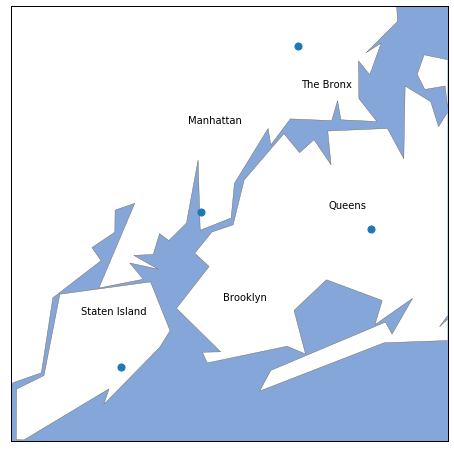

In [142]:
#Plotting schools with hispanic percentage less than 10% and SAT score greater than 1800.
plt.figure(figsize=(8,8))
m = Basemap(
    projection='merc', 
    llcrnrlat=40.496044, 
    urcrnrlat=40.915256, 
    llcrnrlon=-74.255735, 
    urcrnrlon=-73.700272,
    resolution='i'
)
m.drawmapboundary(fill_color='#85A6D9')
m.drawcoastlines(color='#6D5F47', linewidth=.4)
m.drawrivers(color='#6D5F47', linewidth=.4)
m.fillcontinents(color='white',lake_color='#85A6D9')

plt.text(45000,33000, "Queens")
plt.text(41000,50000, "The Bronx")
plt.text(25000,45000, "Manhattan")
plt.text(30000,20000, "Brooklyn")
plt.text(10000,18000, "Staten Island")

longitudes = hispanic_10_1800["lon"].tolist()
latitudes = hispanic_10_1800["lat"].tolist()
m.scatter(longitudes, latitudes, s=50, zorder=2, latlon=True, cmap="summer")
plt.show()

It's interesting to know that each borough except Brooklyn has a school where hispanic student percentage is less than 10% and average SAT score of the school is greater than 1800.

### Gender and SAT Scores

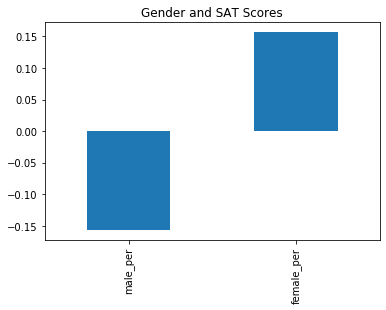

In [47]:
#These two columns indicate the percentage of each gender at a school.
gender_columns = ["male_per", "female_per"]

#Investigate gender differences in SAT scores.
combined.corr()["sat_score"][gender_columns].plot.bar(title = "Gender and SAT Scores")

In the plot above, we can see that a high percentage of females at a school positively correlates with SAT score, whereas a high percentage of males at a school negatively correlates with SAT score. Neither correlation is extremely strong.

Text(0, 0.5, 'SAT Score')

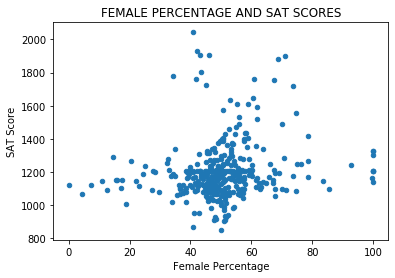

In [147]:
#Investigate schools with high SAT scores and a high female_per.
combined.plot(kind = "scatter", x = "female_per", y = "sat_score", title = "FEMALE PERCENTAGE AND SAT SCORES")
plt.xlabel("Female Percentage")
plt.ylabel("SAT Score")

Based on the scatterplot, there doesn't seem to be any real correlation between sat_score and female_per. However, there is a cluster of schools with a high percentage of females (60 to 80), and high SAT scores. There is also a cluster of schools with female percentage (40 - 60) with SAT scores in the range of 1000 - 14000.

In [149]:
#Research any schools with a female percentage > 60% and an average SAT score > 1700.
female_60_1700 = combined[(combined["female_per"] > 60) & (combined["sat_score"] > 1700)]
female_60_1700[["SCHOOL NAME", "sat_score"]]

,SCHOOL NAME,sat_score
5,BARD HIGH SCHOOL EARLY COLLEGE,1880.0
26,ELEANOR ROOSEVELT HIGH SCHOOL,1756.0
60,BEACON HIGH SCHOOL,1761.0
61,FIORELLO H. LAGUARDIA HIGH SCHOOL OF MUSIC & ART AND PERFORMING ARTS,1720.0
302,TOWNSEND HARRIS HIGH SCHOOL,1897.0


These schools appears to be very selective liberal arts schools that have high academic standards.

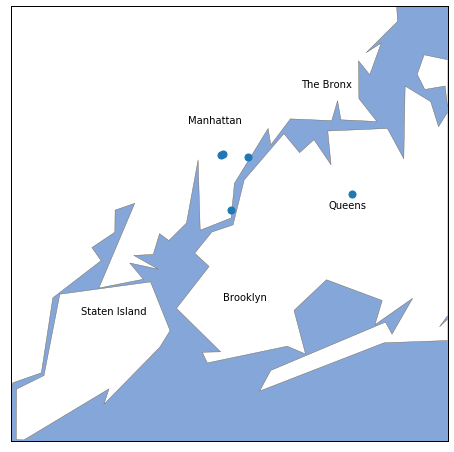

In [150]:
#Plotting schools with a female_per greater than 60% and an average SAT score greater than 1700.
plt.figure(figsize=(8,8))
m = Basemap(
    projection='merc', 
    llcrnrlat=40.496044, 
    urcrnrlat=40.915256, 
    llcrnrlon=-74.255735, 
    urcrnrlon=-73.700272,
    resolution='i'
)
m.drawmapboundary(fill_color='#85A6D9')
m.drawcoastlines(color='#6D5F47', linewidth=.4)
m.drawrivers(color='#6D5F47', linewidth=.4)
m.fillcontinents(color='white',lake_color='#85A6D9')

plt.text(45000,33000, "Queens")
plt.text(41000,50000, "The Bronx")
plt.text(25000,45000, "Manhattan")
plt.text(30000,20000, "Brooklyn")
plt.text(10000,18000, "Staten Island")

longitudes = female_60_1700["lon"].tolist()
latitudes = female_60_1700["lat"].tolist()
m.scatter(longitudes, latitudes, s=50, zorder=2, latlon=True, cmap="summer")
plt.show()

From the scatter plot above, we can know that majority of schools having more than 60% female students in school and SAT score more than 1700 are situated in Manhattan Area.

### AP Scores and SAT Scores
In the US, the Advanced Placement, or AP, exams, are exams that high schoolers take in order to gain college credit. AP exams can be taken in many different subjects, and passing the AP exam means that colleges may grant you credits.

It makes sense that the number of students who took the AP exam in a school and SAT scores would be highly correlated, and let's dig into the relationship. 

In [152]:
#Calculate the percentage of students in each school that took an AP exam.
combined["ap_per"] = combined["AP Test Takers "] / combined["total_enrollment"]

Text(0, 0.5, 'SAT Score')

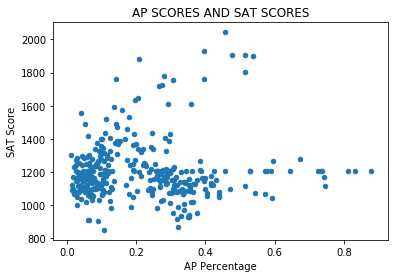

In [153]:
#Investigate the relationship between AP scores and SAT scores.
combined.plot(kind = "scatter", x = "ap_per", y = "sat_score", title = "AP SCORES AND SAT SCORES")
plt.xlabel("AP Percentage")
plt.ylabel("SAT Score")

It looks like there is a relationship between the percentage of students in a school who take the AP exam, and their average SAT scores. Less the percentage of AP exam takers, less is the score. It's not an extremely strong correlation, though.

### Class Size and SAT Scores

Text(0, 0.5, 'SAT Score')

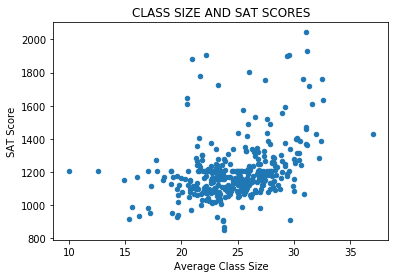

In [154]:
#Investigate the relationship between total_enrollment and SAT scores.
combined.plot(kind = "scatter", x = "AVERAGE CLASS SIZE", y = "sat_score", title = 'CLASS SIZE AND SAT SCORES')
plt.xlabel("Average Class Size")
plt.ylabel("SAT Score")

We can see that a cluster of schools with Average Class Size between 20 - 28, have lower SAT Scores, few schools have a higher SAT Score. Few schools having higher Average Class Size also have higher SAT scores, above 1800. There is not a strong correlation. One might guess that a smaller class size means students recieves more attention from a teacher. But one can also say that the larger class size hass a teacher who has very effective teaching methods.

### Differences Between Parent, Teacher, and Student Survey Responses

In [155]:
#Differences between parent, teacher and student responses to surveys
correlations = combined.corr()
survey_fields = ["saf", "com", "eng", "aca"]
for column in survey_fields:
    corr = correlations[column + "_p_11"][[column + "_t_11", column + "_s_11"]]
    print(corr)

saf_t_11    0.494155
saf_s_11    0.679454
Name: saf_p_11, dtype: float64
com_t_11    0.278552
com_s_11    0.465478
Name: com_p_11, dtype: float64
eng_t_11    0.315837
eng_s_11    0.550878
Name: eng_p_11, dtype: float64
aca_t_11    0.431387
aca_s_11    0.603008
Name: aca_p_11, dtype: float64


As we can see, there's a strong correlation between survey responded by parents, teachers and students in every field except communication. When it comes to communication score, there's a weak correlation between parents' response and teachers' response.

### Boroughs and SAT scores

borough
Bronx            1143.362029
Brooklyn         1162.166685
Manhattan        1259.943250
Queens           1254.815998
Staten Island    1362.500000
Name: sat_score, dtype: float64


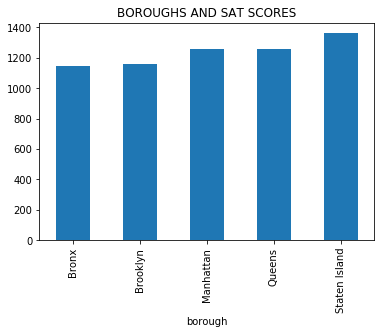

In [156]:
boroughs = combined.groupby("borough")["sat_score"].mean()
print (boroughs)
boroughs.plot(kind = "bar", title = "BOROUGHS AND SAT SCORES")

Staten Island has the highest mean SAT score among all the boroughs, followed by Manhattan and Queens.

### Relation of schools with highest and lowest SAT Scores and Boroughs

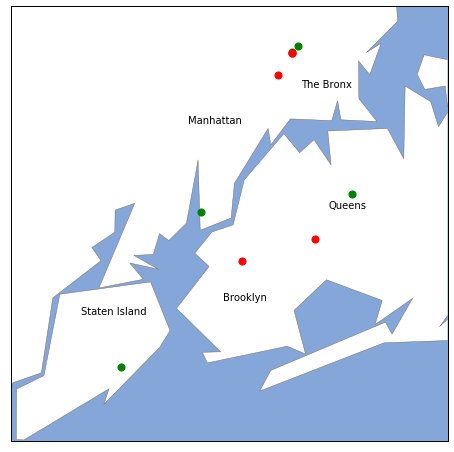

In [157]:
#Plotting schools with a female_per greater than 60% and an average SAT score greater than 1700.
combined = combined.sort_values(by = ["sat_score"], ascending = False)
top_five_schools = combined.head(5)
last_five_schools = combined.tail(5)

plt.figure(figsize=(8,8))
m = Basemap(
    projection='merc', 
    llcrnrlat=40.496044, 
    urcrnrlat=40.915256, 
    llcrnrlon=-74.255735, 
    urcrnrlon=-73.700272,
    resolution='i'
)
m.drawmapboundary(fill_color='#85A6D9')
m.drawcoastlines(color='#6D5F47', linewidth=.4)
m.drawrivers(color='#6D5F47', linewidth=.4)
m.fillcontinents(color='white',lake_color='#85A6D9')

plt.text(45000,33000, "Queens")
plt.text(41000,50000, "The Bronx")
plt.text(25000,45000, "Manhattan")
plt.text(30000,20000, "Brooklyn")
plt.text(10000,18000, "Staten Island")

top_longitudes = top_five_schools["lon"].tolist()
top_latitudes = top_five_schools["lat"].tolist()

last_longitudes = last_five_schools["lon"].tolist()
last_latitudes = last_five_schools["lat"].tolist()

m.scatter(top_longitudes, top_latitudes, s=50, zorder=2, latlon=True, c = "g")
m.scatter(last_longitudes, last_latitudes, s=50, zorder=2, latlon=True, c = "r")
plt.show()

Manhattan, Queens and Staten Island have schools with highest 3% of SAT score, while Queens, Brooklyn and Bronx have schools with lowest 3% of SAT score schools.

### Assigning Scores to Schools Based on sat_score and Other Attributes. 
We will choose below columns which have a high positive or negative correlation with SAT Scores to assign scores to schools. 
We will also give a corresponding factor to each column based on the correlation with SAT scores. We have not included below columns as they are not major contributors to the SAT Score. 
1. Total Grads - % of cohort
2. Total Regents - % of cohort
3. Advanced Regents - % of cohort         
4. Advanced Regents - % of grads


| Columns used | Factor |
| --- | --- |
| sat_score | 0.1 |
| AP Test Takers | 0.05 |
| saf_s_11 | 0.03 |
| asian_per | 0.04 |
| white_per | 0.06 |
| average class size | 0.03 |
| frl_percent | -0.07 |
| ell_percent | -0.04 |
| hispanic_per | -0.03 |

In [57]:
combined["school_rank"] = (combined["sat_score"] * 0.1) + (combined["AP Test Takers "] * 0.05) + (combined["saf_s_11"] * 0.03) + (combined["asian_per"] * 0.04) + (combined["white_per"] * 0.06) + (combined["AVERAGE CLASS SIZE"] * 0.03) + (combined["frl_percent"] * -0.07) + (combined["ell_percent"] * -0.04) + (combined["hispanic_per"] * -0.03)
combined_sorted = combined.sort_values(by = ["school_rank"], ascending = False)

In [58]:
#Check the school_rank column newly added.
combined_sorted.head(2)

,DBN,SCHOOL NAME,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score,sat_score,SchoolName,AP Test Takers,Total Exams Taken,Number of Exams with scores 3 4 or 5,Demographic,School Name,Cohort,Total Cohort,Total Grads - n,Total Grads - % of cohort,Total Regents - n,Total Regents - % of cohort,Total Regents - % of grads,Advanced Regents - n,Advanced Regents - % of cohort,Advanced Regents - % of grads,Regents w/o Advanced - n,Regents w/o Advanced - % of cohort,Regents w/o Advanced - % of grads,Local - n,Local - % of cohort,Local - % of grads,Still Enrolled - n,Still Enrolled - % of cohort,Dropped Out - n,Dropped Out - % of cohort,CSD,NUMBER OF STUDENTS / SEATS FILLED,NUMBER OF SECTIONS,AVERAGE CLASS SIZE,SIZE OF SMALLEST CLASS,SIZE OF LARGEST CLASS,SCHOOLWIDE PUPIL-TEACHER RATIO,Name,schoolyear,fl_percent,frl_percent,total_enrollment,prek,k,grade1,grade2,grade3,grade4,grade5,grade6,grade7,grade8,grade9,grade10,grade11,grade12,ell_num,ell_percent,sped_num,sped_percent,ctt_num,selfcontained_num,asian_num,asian_per,black_num,black_per,hispanic_num,hispanic_per,white_num,white_per,male_num,male_per,female_num,female_per,rr_s,rr_t,rr_p,N_s,N_t,N_p,saf_p_11,com_p_11,eng_p_11,aca_p_11,saf_t_11,com_t_11,eng_t_11,aca_t_11,saf_s_11,com_s_11,eng_s_11,aca_s_11,saf_tot_11,com_tot_11,eng_tot_11,aca_tot_11,dbn,school_name,borough,building_code,phone_number,fax_number,grade_span_min,grade_span_max,expgrade_span_min,expgrade_span_max,bus,subway,primary_address_line_1,city,state_code,postcode,website,total_students,campus_name,school_type,overview_paragraph,program_highlights,language_classes,advancedplacement_courses,online_ap_courses,online_language_courses,extracurricular_activities,psal_sports_boys,psal_sports_girls,psal_sports_coed,school_sports,partner_cbo,partner_hospital,partner_highered,partner_cultural,partner_nonprofit,partner_corporate,partner_financial,partner_other,addtl_info1,addtl_info2,start_time,end_time,se_services,ell_programs,school_accessibility_description,number_programs,priority01,priority02,priority03,priority04,priority05,priority06,priority07,priority08,priority09,priority10,Location 1,Community Board,Council District,Census Tract,BIN,BBL,NTA,lat,lon,school_dist,ap_per,school_rank
37,02M475,STUYVESANT HIGH SCHOOL,832,679.0,735.0,682.0,2043.0,STUYVESANT HS,1510.0,2819.0,2648.0,Total Cohort,STUYVESANT HIGH SCHOOL,2006,787.0,774,98.3,774,98.3,100.0,770,97.8,99.5,4,0.5,0.5,0,0.0,0.0,10,1.3,3,0.4,2,876.052632,28.000000,31.115789,24.105263,33.842105,0.0,STUYVESANT HIGH SCHOOL,20112012,0,30.3,3297,,,,,,,,,,,813,827,848,809,0.0,0.0,14.0,0.4,0,0,2377,72.1,40,1.2,80,2.4,780,23.7,1956.0,59.3,1341.0,40.7,93.0,95,33,3039.0,161.0,1062.0,8.4,7.5,7.7,7.7,7.2,5.6,6.1,7.2,7.5,6.2,7.0,7.9,7.7,6.4,6.9,7.6,02M475,Stuyvesant High School,Manhattan,M477,212-312-4800,212-587-3874,9.0,12,0.0,12.0,"M20, M22, M5, M9, S1115","1, 2, 3, A, C, E to Chambers St ; R to City Hall",345 Chambers Street,New York,NY,10282,http://stuy.edu,3292.0,0,Specialized School,"Our goal is to provide our students with the best educational opportunities in Science, Mathematics and Technology as well as a broad range of Humanities selectives and electives. This has been the foundation of our educational success and remains the cornerstone of our educational program. Within this context, we instill the intellectual, moral and humanistic values necessary for each child to achieve his/her maximum potential as a student and as a caring citizen of the world.","Mentoring in Intel Science Program through professional research facilities, Youth in Engineering and Science (YES) Summer Research Program, Massachusetts Institute of Technology (MIT) Research Science Program, Science Research Training Program at Rockefeller University, College Now, College Visitation Tours, Summer Scholar Academy in Math-Science, Speech and Debate Team, Math Team, Bio-Olympiad Team, Science Olympiad Team, Robotics, Summer Leadership Program, College-level co

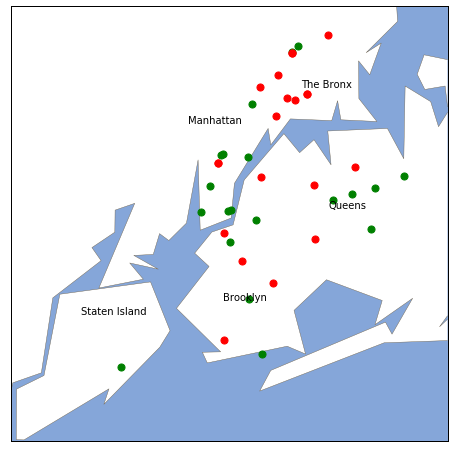

In [158]:
#Plot the top 20 and the bottom 20 schools based on the school score on the map
plt.figure(figsize=(8,8))
m = Basemap(
    projection='merc', 
    llcrnrlat=40.496044, 
    urcrnrlat=40.915256, 
    llcrnrlon=-74.255735, 
    urcrnrlon=-73.700272,
    resolution='i'
)
m.drawmapboundary(fill_color='#85A6D9')
m.drawcoastlines(color='#6D5F47', linewidth=.4)
m.drawrivers(color='#6D5F47', linewidth=.4)
m.fillcontinents(color='white',lake_color='#85A6D9')

plt.text(45000,33000, "Queens")
plt.text(41000,50000, "The Bronx")
plt.text(25000,45000, "Manhattan")
plt.text(30000,20000, "Brooklyn")
plt.text(10000,18000, "Staten Island")

top_longitudes = combined_sorted["lon"].head(20).tolist()
top_latitudes = combined_sorted["lat"].head(20).tolist()

last_longitudes = combined_sorted["lon"].tail(20).tolist()
last_latitudes = combined_sorted["lat"].tail(20).tolist()

m.scatter(top_longitudes, top_latitudes, s=50, zorder=2, latlon=True, c = "g")
m.scatter(last_longitudes, last_latitudes, s=50, zorder=2, latlon=True, c = "r")
plt.show()

Bronx has many low performing schools, while Manhattan has many high performing school. Brooklyn and Queens have a mix of low and high performing schools.

### Conclusions
We investigated the data to investigate the correlations between SAT scores and demographics, race, gender and income. We can conclude that:

1. Safety score ranges from 5. to 9.0. No school with a safety score lower than 6.5 has an average SAT score higher than 1500 or so. Upper Manhattan, west Queens and lower Bronx tend to have higher safety scores, whereas Brooklyn has low safety scores.
2. Higer SAT score is seen in schools with higher percentage of white or asian students and specialized science and technology schools whereas lower SAT scores are seen in schools having a higher percentage of black or hispanic students and international schools.
3. Each borough except Brooklyn has a school where hispanic student percentage is less than 10% and average SAT score of the school is greater than 1800.
4. There is a strong correlation between survey responded by parents, teachers and students in every field except communication. When it comes to communication score, there's a weak correlation between parents' response and teachers' response.
5. Bronx has more schools with 95% hispanic student popluation, it has the lowest average SAT score and many low performing schools. But few schools in are also amongst the highest 3% of SAT score schools.
6. Manhattan Area has selective liberal arts schools with with a female percentage greater than 60% and an average SAT score greater than 1700, schools with highest 3% of SAT score and many high performing schools. It has the 2nd highest mean SAT score.
7. Queens has a mix of high and low performing schools. Queens schools have an average SAT score.
8. Brooklyn has the 2nd lowest mean SAT score, it has a mix of high and low performing schools.
9. Staten Island has the highest averag SAT score.